In [2]:
import pandas as pd


file_path = r"C:/Users/Zainab/Downloads/20170306-swimming-times2.csv"
df = pd.read_csv(file_path)
df.head()

,Event,Distance,Sex,Ranking,Time 1,Miliseconds,Relay,When,Name,Nationality,Date,Meet,Location
0,50 m freestyle,50,Male,1,00:23.86,23086,NaN,En route to final mark,Jonty Skinner,South Africa,"Saturday, August 14, 1976",AAU Nationals,"Philadelphia, PA, United States"
1,50 m freestyle,50,Male,2,00:23.74,23074,NaN,Final,Joe Bottom,United States,"Sunday, July 3, 1977",-,"Etobicoke, Canada"
2,50 m freestyle,50,Male,3,00:23.72,23072,NaN,Final,Ron Manganiello,United States,"Saturday, July 29, 1978",-,"Miami, FL, United States"
3,50 m freestyle,50,Male,4,00:23.70,23007,NaN,Final,Klaus Steinbach,West Germany,"Monday, July 23, 1979",-,"Freiburg, West Germany"
4,50 m freestyle,50,Male,5,00:23.66,23066,NaN,Final,Chris Cavanaugh,United States,"Saturday, February 2, 1980",International Invitational,"Amersfoort, Netherlands"


In [3]:
# Convert 'Time 1' to seconds 
def time_to_seconds(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 2:  
            minutes = int(parts[0])
            seconds = float(parts[1])
            return minutes * 60 + seconds
        elif len(parts) == 1:  
            return float(parts[0])
        else:
            return None  
    except:
        return None

df['Time_seconds'] = df['Time 1'].apply(time_to_seconds)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [4]:
# Display the cleaned data
print(df.head())
print(df.info())


            Event  Distance   Sex Ranking    Time 1  Miliseconds Relay  \
0  50 m freestyle        50  Male       1  00:23.86        23086   NaN   
1  50 m freestyle        50  Male       2  00:23.74        23074   NaN   
2  50 m freestyle        50  Male       3  00:23.72        23072   NaN   
3  50 m freestyle        50  Male       4  00:23.70        23007   NaN   
4  50 m freestyle        50  Male       5  00:23.66        23066   NaN   

                     When             Name    Nationality       Date  \
0  En route to final mark    Jonty Skinner   South Africa 1976-08-14   
1                   Final       Joe Bottom  United States 1977-07-03   
2                   Final  Ron Manganiello  United States 1978-07-29   
3                   Final  Klaus Steinbach   West Germany 1979-07-23   
4                   Final  Chris Cavanaugh  United States 1980-02-02   

                         Meet                         Location  Time_seconds  
0               AAU Nationals  Philadelphia

In [5]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)


Event              0
Distance           0
Sex                0
Ranking            0
Time 1             0
Miliseconds        0
Relay           2090
When             611
Name               5
Nationality        5
Date               1
Meet             789
Location          15
Time_seconds       0
dtype: int64


In [6]:
# Drop the Relay column since it has too many missing values
df.drop(columns=['Relay'], inplace=True)

# For columns with moderate missing values, fill them with "Unknown"
df['When'].fillna("Unknown", inplace=True)
df['Meet'].fillna("Unknown", inplace=True)
df['Location'].fillna("Unknown", inplace=True)

# For Name and Nationality, fill missing values with "Unknown"
df['Name'].fillna("Unknown", inplace=True)
df['Nationality'].fillna("Unknown", inplace=True)

# For Date, drop the row with missing value 
df = df.dropna(subset=['Date'])

# Check missing values again
print(df.isnull().sum())


Event           0
Distance        0
Sex             0
Ranking         0
Time 1          0
Miliseconds     0
When            0
Name            0
Nationality     0
Date            0
Meet            0
Location        0
Time_seconds    0
dtype: int64


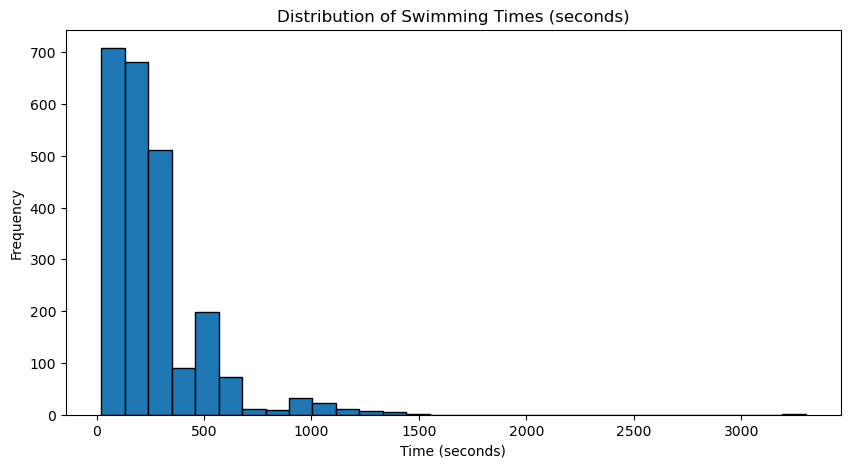

In [7]:
import matplotlib.pyplot as plt

# Histogram for Time_seconds
plt.figure(figsize=(10, 5))
plt.hist(df['Time_seconds'], bins=30, edgecolor='black')
plt.title("Distribution of Swimming Times (seconds)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

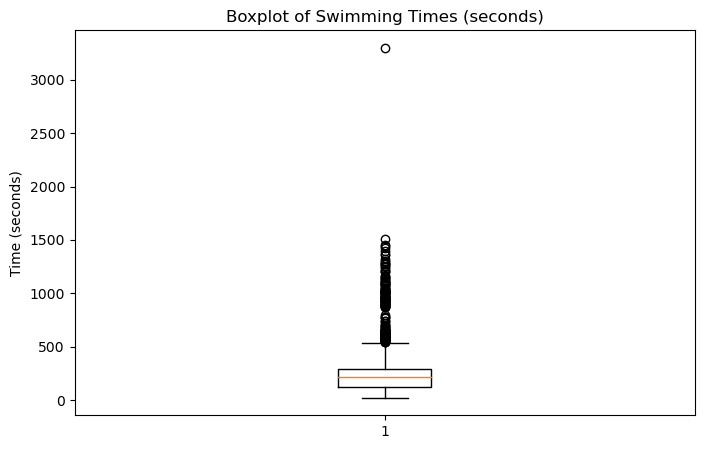

In [8]:
# Boxplot for Time_seconds to detect outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['Time_seconds'])
plt.title("Boxplot of Swimming Times (seconds)")
plt.ylabel("Time (seconds)")
plt.show()

In [9]:
# Inspect rows with very high times, say above 1000 seconds
outliers_df = df[df['Time_seconds'] > 1000]
print(outliers_df)


                 Event  Distance     Sex Ranking    Time 1  Miliseconds  \
278   1500 m freestyle      1500    Male       1  22:48.40      1368004   
279   1500 m freestyle      1500    Male       2  22:00.00      1320000   
280   1500 m freestyle      1500    Male       3  21:35.30      1295003   
281   1500 m freestyle      1500    Male       4  21:15.00      1275000   
282   1500 m freestyle      1500    Male       5  21:11.40      1271004   
283   1500 m freestyle      1500    Male       6  20:06.60      1206006   
284   1500 m freestyle      1500    Male       7  20:04.40      1204004   
285   1500 m freestyle      1500    Male       8  19:07.20      1147002   
286   1500 m freestyle      1500    Male       9  18:58.80      1138008   
287   1500 m freestyle      1500    Male      10  18:35.70      1115007   
288   1500 m freestyle      1500    Male      11  18:19.00      1099000   
289   1500 m freestyle      1500    Male      12  18:05.90      1085009   
290   1500 m freestyle   

In [10]:

df.to_csv('processed_swimming_data.csv', index=False)


In [11]:
import os


downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "processed_swimming_data.csv")


df.to_csv(downloads_path, index=False)
